In [3]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")
METRICS_DIR = "diploma/results/RAGAS/"

### Comparison of chunk_size and chunk_num

Let's compare the measurements. The higher score is better.

In [10]:
compare_chunk_related = pd.read_csv(METRICS_DIR + "compare_chunks_splitter_related.csv")
compare_chunk_related.style.highlight_max(subset=["faithfulness", "context_recall", "context_precision", "answer_relevancy"])

,chunk_size,chunk_num,embedding_function,splitter,faithfulness,context_recall,context_precision,answer_relevancy,faithfulness_nan_percent,context_recall_nan_percent,context_precision_nan_percent,answer_relevancy_nan_percent
0,100,1,huggingface,related,0.776715,0.369440,0.406627,0.563130,12.500000,0.000000,0.000000,0.000000
1,100,2,huggingface,related,0.781404,0.361446,0.540663,0.638185,7.831325,0.000000,0.000000,0.000000
2,100,3,huggingface,related,0.793618,0.379871,0.632530,0.672042,6.777108,0.000000,0.000000,0.000000
3,100,4,huggingface,related,0.793636,0.353489,0.649096,0.680614,6.626506,0.000000,0.000000,0.000000
4,200,1,huggingface,related,0.751638,0.347741,0.527108,0.628155,8.734940,0.000000,0.000000,0.000000
5,200,2,huggingface,related,0.774317,0.362902,0.635542,0.691228,5.271084,0.000000,0.000000,0.000000
6,200,3,huggingface,related,0.812045,0.411111,0.707831,0.728820,3.915663,0.000000,0.000000,0.000000
7,200,4,huggingface,related,0.824742,0.428855,0.731928,0.749885,4.066265,0.000000,0.000000,0.000000
8,400,1,huggingface,related,0.792562,0.379687,0.560241,0.689915,7.981928,0.000000,0.000000,0.000000
9,400,2,huggingface,related,0.813614,0.442672,0.689759,0.738194,3.915663,0.000000,0.000000,0.000000


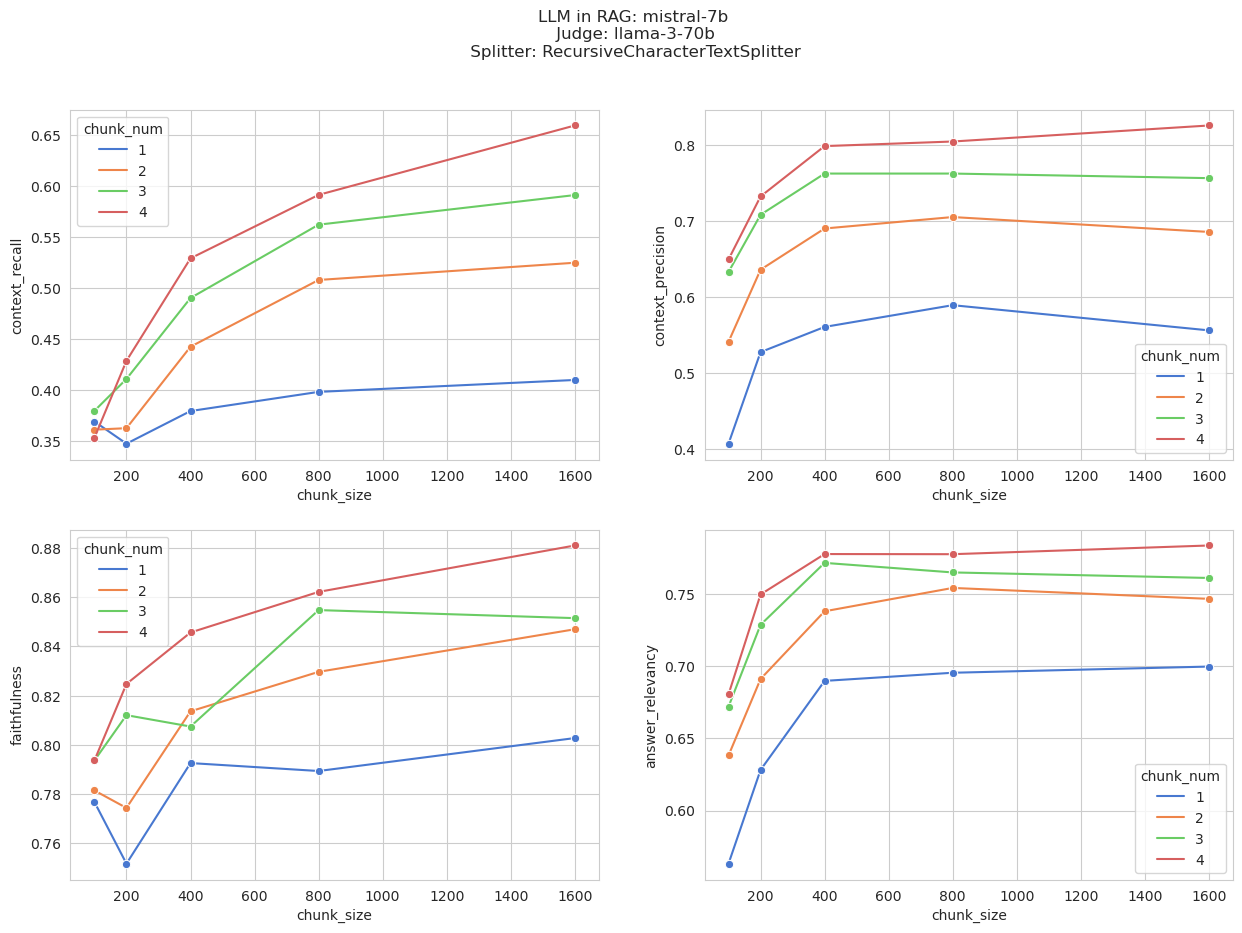

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.lineplot(data=compare_chunk_related, x="chunk_size", y="context_recall", hue="chunk_num", palette="muted", ax=ax[0][0], marker="o");
sns.lineplot(data=compare_chunk_related, x="chunk_size", y="context_precision", hue="chunk_num", palette="muted", ax=ax[0][1], marker="o");

sns.lineplot(data=compare_chunk_related, x="chunk_size", y="faithfulness", hue="chunk_num", palette="muted", ax=ax[1][0], marker="o");
sns.lineplot(data=compare_chunk_related, x="chunk_size", y="answer_relevancy", hue="chunk_num", palette="muted", ax=ax[1][1], marker="o");

fig.suptitle("LLM in RAG: mistral-7b\n Judge: llama-3-70b\n Splitter: RecursiveCharacterTextSplitter");

### Comparison of text splitters

In [11]:
splitters = pd.read_csv(METRICS_DIR + "compare_splitters.csv", index_col=0)
# splitters.style.highlight_max(subset=["faithfulness", "context_recall", "context_precision", "answer_relevancy"])
splitters

,chunk_size,chunk_num,embedding_function,splitter,faithfulness,context_recall,context_precision,answer_relevancy,faithfulness_nan_percent,context_recall_nan_percent,context_precision_nan_percent,answer_relevancy_nan_percent
0,800,4,huggingface,semantic,0.838184,0.654158,0.758551,0.740999,25.301205,27.259036,25.150602,22.289157
1,800,4,huggingface,related,0.862186,0.591325,0.804217,0.777801,2.710843,0.000000,0.000000,0.000000
2,800,4,huggingface,character,0.853706,0.615883,0.825301,0.784179,3.012048,0.000000,0.000000,0.000000
3,800,4,huggingface,token,0.852220,0.790636,0.822289,0.706690,2.259036,0.000000,0.000000,0.000000


### Checking the variability of measurements

In [23]:
results_before = pd.read_csv(METRICS_DIR + "check_stability_before.csv", index_col=0)
mixtral_std_before = results_before[results_before.judge == "mixtral-8x7b-instruct-fp16"].agg({"faithfulness": "std"}).values[0]
mixtral_before = pd.DataFrame({"judge": ["mixtral-8x7b-before"], "faithfulness_std": [mixtral_std_before]})

results_after = pd.read_csv(METRICS_DIR + "check_stability_after.csv")
mixtral_std_after = results_after["faithfulness"].std()
mixtral_after = pd.DataFrame({"judge": ["mixtral-8x7b-after"], "faithfulness_std": [mixtral_std_after]})

results_after = pd.read_csv(METRICS_DIR + "check_stability_llama-3-70b.csv")
llama_3_70b = pd.DataFrame({"judge": ["llama-3-70b"], "faithfulness_std": [f"{results_after.faithfulness.std():.4f}"]})

pd.concat([mixtral_before, mixtral_after, llama_3_70b], ignore_index=True)

,judge,faithfulness_std
0,mixtral-8x7b-before,0.043308
1,mixtral-8x7b-after,0.024394
2,llama-3-70b,0.0000
